# Compare GROMACS large benchmark performance

In [1]:
import re
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def getperf(filename):
    infile = open(filename, 'r')
    perf = []
    for line in infile:
        if re.search('Performance:', line):
            line = line.strip()
            tokens = line.split()
            perf = float(tokens[1])
    infile.close()
    
    return perf

In [30]:
def calcperf(filedict, cpn):
    coreslist = []
    perflist = []
    sulist = []
    print "{:>15s} {:>15s} {:>15s} {:>15s}".format('Nodes', 'Cores', 'Perf (ns/day)', 'Speedup')
    print "{:>15s} {:>15s} {:>15s} {:>15s}".format('=====', '=====', '=============', '=======')
    for nodes, filename in sorted(filedict.items()):
        coreslist.append(nodes*cpn)
        perf = getperf(filename)
        perflist.append(perf)
        speedup = perf/perflist[0]
        sulist.append(speedup)
        print "{:>15d} {:>15d} {:>15.3f} {:>15.2f}".format(nodes, nodes*cpn, perf, speedup)
    return coreslist, perflist, sulist

In [31]:
archerfiles = {16:'../large/results/ARCHER/nc2-cubic-md_16nodes_201711160216.log',
               32:'../large/results/ARCHER/nc2-cubic-md_32nodes_201711140119.log',
               64:'../large/results/ARCHER/nc2-cubic-md_64nodes_201711142033.log',
               128:'../large/results/ARCHER/nc2-cubic-md_128nodes_201711150053.log',
               256:'../large/results/ARCHER/nc2-cubic-md_256nodes_201711150622.log'}

In [32]:
archercpn = 24
archercores, archerperf, archersu = calcperf(archerfiles, archercpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
             16             384           0.243            1.00
             32             768           0.406            1.67
             64            1536           0.631            2.60
            128            3072           0.826            3.40
            256            6144           0.885            3.64


In [33]:
cirrusfiles = {4:'../large/results/Cirrus/GromacsBench_4nodes_cirrus.log',
               8:'../large/results/Cirrus/GromacsBench_8nodes_cirrus.log',
               16:'../large/results/Cirrus/GromacsBench_16nodes_cirrus.log',
               35:'../large/results/Cirrus/GromacsBench_35nodes_cirrus.log',
               64:'../large/results/Cirrus/GromacsBench_64nodes_cirrus.log',
               70:'../large/results/Cirrus/GromacsBench_70nodes_cirrus.log',
               135:'../large/results/Cirrus/GromacsBench_135nodes_cirrus.log',
               270:'../large/results/Cirrus/GromacsBench_270nodes_cirrus.log'
               }

In [58]:
cirruscpn = 36
cirruscores, cirrusperf, cirrussu = calcperf(cirrusfiles, cirruscpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              4             144           0.118            1.00
              8             288           0.210            1.78
             16             576           0.349            2.96
             35            1260           0.532            4.51
             64            2304           0.647            5.48
             70            2520           0.684            5.80
            135            4860           0.679            5.75
            270            9720           0.819            6.94


In [59]:
athenafiles = {2:'../large/results/Athena/nc2-cubic-md_2nodes_201710061035.log',
               4:'../large/results/Athena/nc2-cubic-md_4nodes_201710051544.log',
               8:'../large/results/Athena/nc2-cubic-md_8nodes_201709271022.log',
               16:'../large/results/Athena/nc2-cubic-md_16nodes_201710061242.log'
               }

In [60]:
athenacpn = 28
athenacores, athenaperf, athenasu = calcperf(athenafiles, athenacpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              2              56           0.060            1.00
              4             112           0.110            1.83
              8             224           0.211            3.52
             16             448           0.355            5.92


In [61]:
thomasfiles = {2:'../large/results/Thomas/nc2-cubic-md_2nodes_201710060907.log',
               4:'../large/results/Thomas/nc2-cubic-md_4nodes_201710061013.log',
               8:'../large/results/Thomas/nc2-cubic-md_8nodes_201710061118.log',
               16:'../large/results/Thomas/nc2-cubic-md_16nodes_201710062042.log'
               }

In [62]:
thomascpn = 24
thomascores, thomasperf, thomassu = calcperf(thomasfiles, thomascpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              2              48           0.057            1.00
              4              96           0.106            1.86
              8             192           0.191            3.35
             16             384           0.324            5.68


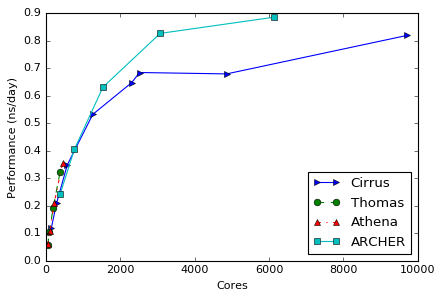

In [63]:
plt.plot(cirruscores, cirrusperf, '>-', label='Cirrus')
plt.plot(thomascores, thomasperf, 'o--', label='Thomas')
plt.plot(athenacores, athenaperf, '^-.', label='Athena')
plt.plot(archercores, archerperf, 's-', label='ARCHER')
plt.xlabel('Cores')
plt.ylabel('Performance (ns/day)')
plt.legend(loc='best')

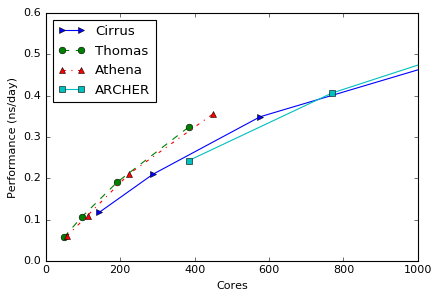

In [64]:
plt.xlim([0,1000])
plt.ylim([0,0.6])
plt.plot(cirruscores, cirrusperf, '>-', label='Cirrus')
plt.plot(thomascores, thomasperf, 'o--', label='Thomas')
plt.plot(athenacores, athenaperf, '^-.', label='Athena')
plt.plot(archercores, archerperf, 's-', label='ARCHER')
plt.xlabel('Cores')
plt.ylabel('Performance (ns/day)')
plt.legend(loc='best')

## 16 node performance comparisons

In [65]:
nperf = {}
cperf = {}
nperf['ARCHER'] = archerperf[0]
cperf['ARCHER'] = archerperf[0]/(archercpn)
nperf['Cirrus'] = cirrusperf[2]
cperf['Cirrus'] = cirrusperf[2]/(cirruscpn)
nperf['Thomas'] = thomasperf[3]
cperf['Thomas'] = thomasperf[3]/(thomascpn)
nperf['Athena'] = athenaperf[3]
cperf['Athena'] = athenaperf[3]/(athenacpn)

print "Performance improvement relative to ARCHER:\n"
print "{:>15s} {:>15s} {:>15s}".format('System', 'Perf (ns/day)', 'Improvement')
print "{:>15s} {:>15s} {:>15s}".format('======', '=============', '===========')
print "16-nodes"
for system in nperf:
    print "{:>15s} {:>15.3f} {:>15.3f}".format(system, nperf[system], nperf[system]/nperf['ARCHER'])

print "per-core"
for system in cperf:
    print "{:>15s} {:>15.3f} {:>15.3f}".format(system, cperf[system], cperf[system]/cperf['ARCHER'])

Performance improvement relative to ARCHER:

         System   Perf (ns/day)     Improvement
         ======   =============     ===========
16-nodes
         Thomas           0.324           1.333
         ARCHER           0.243           1.000
         Cirrus           0.349           1.436
         Athena           0.355           1.461
per-core
         Thomas           0.013           1.333
         ARCHER           0.010           1.000
         Cirrus           0.010           0.957
         Athena           0.013           1.252
